# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(3755, 3755)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=2000, profit_margin_diff=800)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-03-24 17:47:37,liquid,coincheck,BTC/JPY,0.009,10
1,2020-03-24 17:47:46,coincheck,liquid,BTC/JPY,0.009,0
2,2020-03-24 17:52:45,liquid,coincheck,BTC/JPY,0.009,9
3,2020-03-24 17:52:58,coincheck,liquid,BTC/JPY,0.009,-1
4,2020-03-24 18:00:10,liquid,coincheck,BTC/JPY,0.009,9
5,2020-03-24 18:00:23,coincheck,liquid,BTC/JPY,0.009,-1
6,2020-03-24 18:05:04,liquid,coincheck,BTC/JPY,0.009,10
7,2020-03-24 18:05:07,coincheck,liquid,BTC/JPY,0.009,-3
8,2020-03-24 18:05:23,liquid,coincheck,BTC/JPY,0.009,11
9,2020-03-24 18:05:28,coincheck,liquid,BTC/JPY,0.009,-2


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-03-24 17:47:37,買い,liquid,742871.0
1,2020-03-24 17:47:37,売り,coincheck,744000.0
2,2020-03-24 17:47:46,買い,coincheck,742517.0
3,2020-03-24 17:47:46,売り,liquid,742513.0
4,2020-03-24 17:52:45,買い,liquid,743363.0
...,...,...,...,...
59,2020-03-24 18:45:26,売り,liquid,752439.0
60,2020-03-24 18:48:25,買い,liquid,753018.0
61,2020-03-24 18:48:25,売り,coincheck,754041.0
62,2020-03-24 18:49:36,買い,coincheck,753632.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
+---------------------+---------------------+
|          レコード数 |                3755 |
+---------------------+---------------------+
|            取引回数 |                  32 |
+---------------------+---------------------+
|            開始日時 | 2020-03-24 17:42:07 |
+---------------------+---------------------+
|            終了日時 | 2020-03-24 18:50:19 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 01:08:12 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.009 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                1000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                 800 |
+---------------------+---------------------+

バックテスト結果
+-------------+---------+
| 開始[JPY]   |   12000 |
+-------------+---------+
| 終了[JPY]   |   12134 |
+-------------+---------+
| 利益[JPY]   |     134 |
+-------------+---------+
| 開始[BTC]   |   0.022 |
+-------------+---------+
| 終了[BTC]  

## グラフ出力

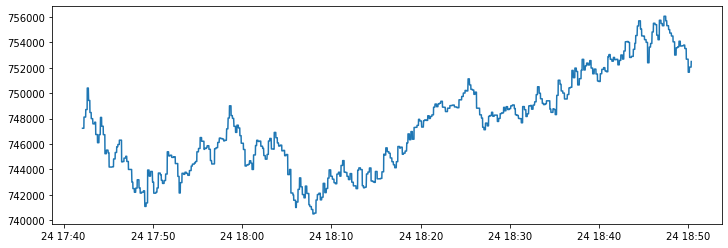

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

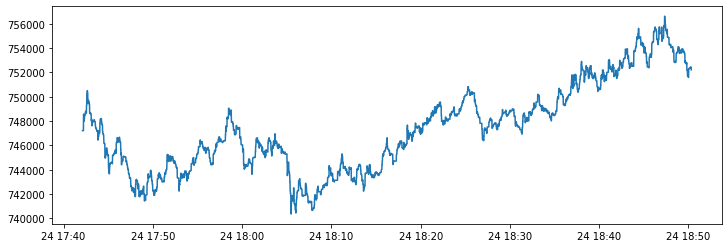

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_lq.index, df_lq['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_cc.index),
    "buy_coincheck_sell_liquid": df_lq.reset_index().bid - df_cc.reset_index().ask,
    "buy_liquid_sell_coincheck": df_cc.reset_index().bid - df_lq.reset_index().ask,
    'coincheck_bid': df_cc.reset_index().bid,
     'liquid_ask': df_lq.reset_index().ask,
    'liquid_bid': df_lq.reset_index().bid,
    'coincheck_ask': df_cc.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-03-24 17:40:00,-455,-314,745165,745478,745205,745659
2020-03-24 17:50:00,-470,-243,745116,745358,745148,745618
2020-03-24 18:00:00,-432,-280,743855,744135,743878,744310
2020-03-24 18:10:00,-98,-525,744428,744953,744735,744833
2020-03-24 18:20:00,-631,90,748776,748686,748509,749139
2020-03-24 18:30:00,-689,61,749992,749931,749749,750438
2020-03-24 18:40:00,-736,69,753728,753659,753445,754181
2020-03-24 18:50:00,-214,-461,751944,752405,752274,752488
